# Exploratory Data analysis Capstone project

## Data analysis on Tarrorism

In [1]:
# Importing all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline 

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
# Set the theme for graphs
sns.set(style='dark')




In [3]:
# set the theme 
sns.set_palette('muted')

In [4]:
# import data 
data = pd.read_csv("globalterrorism.csv",encoding="latin1")
## Imp : For this specific file use above encoding 

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data.shape

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
# Renaming all the columns
data.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'extended':'Extended', 
                     'resolution':'Resolution', 'attacktype1_txt':'Attacktype', 'country_txt':'Country', 
                     'region_txt':'Region', 'provstate':'Provstate', 'city':'City', 'crit1':'Crit1', 
                     'crit2':'Crit2', 'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 
                     'suicide':'Suicide', 'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 
                     'natlty2_txt':'Natlty2',  'natlty3_txt':'Natlty3', 'gname':'Gname', 
                     'gname2':'Gname2', 'gname3':'Gname3', 'guncertain1':'Guncertain1', 
                     'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 'claimed':'Claimed', 
                     'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 'nkill':'Kill', 
                     'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Wound', 'nwoundus':'Nwoundus','nwoundte':'Nwoundter', 'property':'Property', 'propextent_txt':'Propextent', 
                     'propvalue':'Propvalue', 'ishostkid':'Ishostkid',  'nhostkid':'Nhostkid', 
                     'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 'hostkidoutcome':'Hostkidoutcome', 
                     'nreleased':'Nreleased'},inplace=True)
 
                   


In [8]:
# keeping the useful columns for the data analysis and not taking uneccessary cols
data = data[['Eventid','Year','Month','Day','Country','Provstate','Region','Provstate','City','latitude','Kill',
             'longitude','Crit1','Crit2','Crit3','Success','Suicide','Attacktype','Targtype','Natlty1','Gname', 
             'Guncertain1','Claimed', 'Weaptype','summary','motive','Wound','Extended','Ishostkid',
             'Hostkidoutcome']]



In [9]:
data.shape

(181691, 30)

In [10]:
# descriptive/summary analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Eventid         181691 non-null  int64  
 1   Year            181691 non-null  int64  
 2   Month           181691 non-null  int64  
 3   Day             181691 non-null  int64  
 4   Country         181691 non-null  object 
 5   Provstate       181270 non-null  object 
 6   Region          181691 non-null  object 
 7   Provstate       181270 non-null  object 
 8   City            181257 non-null  object 
 9   latitude        177135 non-null  float64
 10  Kill            171378 non-null  float64
 11  longitude       177134 non-null  float64
 12  Crit1           181691 non-null  int64  
 13  Crit2           181691 non-null  int64  
 14  Crit3           181691 non-null  int64  
 15  Success         181691 non-null  int64  
 16  Suicide         181691 non-null  int64  
 17  Attacktype

In [11]:
# statistical analysis
data.describe()

,Eventid,Year,Month,Day,latitude,Kill,longitude,Crit1,Crit2,Crit3,Success,Suicide,Guncertain1,Claimed,Wound,Extended,Ishostkid,Hostkidoutcome
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,171378.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181311.000000,115571.000000,165380.000000,181691.000000,181513.000000,10991.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,2.403272,-4.586957e+02,0.988530,0.993093,0.875668,0.889598,0.036507,0.081440,0.049666,3.167668,0.045346,0.059054,4.629242
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,11.545741,2.047790e+05,0.106483,0.082823,0.329961,0.313391,0.187549,0.273511,1.093195,35.949392,0.208063,0.461244,2.035360
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,0.000000,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,-9.000000,1.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,0.000000,4.545640e+00,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,0.000000,4.324651e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,2.000000,6.871033e+01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,7.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1570.000000,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8191.000000,1.000000,1.000000,7.000000


In [12]:
# statistical analysis
# taking tanspose i.e changing row & col indexes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
Year,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
Month,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
Day,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
latitude,177135.0,2.349834e+01,1.856924e+01,-5.315461e+01,1.151005e+01,3.146746e+01,3.468509e+01,7.463355e+01
Kill,171378.0,2.403272e+00,1.154574e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.570000e+03
longitude,177134.0,-4.586957e+02,2.047790e+05,-8.618590e+07,4.545640e+00,4.324651e+01,6.871033e+01,1.793667e+02
Crit1,181691.0,9.885300e-01,1.064825e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Crit2,181691.0,9.930927e-01,8.282305e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Crit3,181691.0,8.756680e-01,3.299608e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
data


,Eventid,Year,Month,Day,Country,Provstate,Region,Provstate,City,latitude,...,Gname,Guncertain1,Claimed,Weaptype,summary,motive,Wound,Extended,Ishostkid,Hostkidoutcome
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,MANO-D,0.0,NaN,Unknown,NaN,NaN,0.0,0,0.0,NaN
1,197000000002,1970,0,0,Mexico,Federal,North America,Federal,Mexico city,19.371887,...,23rd of September Communist League,0.0,NaN,Unknown,NaN,NaN,0.0,0,1.0,NaN
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Tarlac,Unknown,15.478598,...,Unknown,0.0,NaN,Unknown,NaN,NaN,0.0,0,0.0,NaN
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Attica,Athens,37.997490,...,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN,0,0.0,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,Fukouka,33.580412,...,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,...,Al-Shabaab,0.0,1.0,Firearms,12/31/2017: Assailants opened fire on a Somali...,NaN,2.0,0,0.0,NaN
181687,201712310029,2017,12,31,Syria,Lattakia,Middle East & North Africa,Lattakia,Jableh,35.407278,...,Muslim extremists,0.0,0.0,Explosives,12/31/2017: Assailants launched mortars at the...,NaN,7.0,0,0.0,NaN
181688,201712310030,2017,12,31,Philippines,Maguindanao,Southeast Asia,Maguindanao,Kubentog,6.900742,...,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0.0,Incendiary,12/31/2017: Assailants set fire to houses in K...,NaN,0.0,0,0.0,NaN
181689,201712310031,2017,12,31,India,Manipur,South Asia,Manipur,Imphal,24.798346,...,Unknown,0.0,0.0,Explosives,12/31/2017: Assailants threw a grenade at a Fo...,NaN,0.0,0,0.0,NaN



## Exploration of data

### 1 . NO OF ATTACKS EACH YEAR

In [13]:

data['Year'].unique()


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [15]:
# solution
data['Year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [16]:
# Same as above but droping the null values
data['Year'].value_counts(dropna=True) # Alredy values are sorted

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

In [17]:
# Same as above but droping the null values & Sorting the index
data['Year'].value_counts(dropna=True).sort_index()   # by default is was sorted in values perspective

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

In [18]:
# now ploting the sol of Q1
sol1 = data['Year'].value_counts(dropna=True).sort_index() 

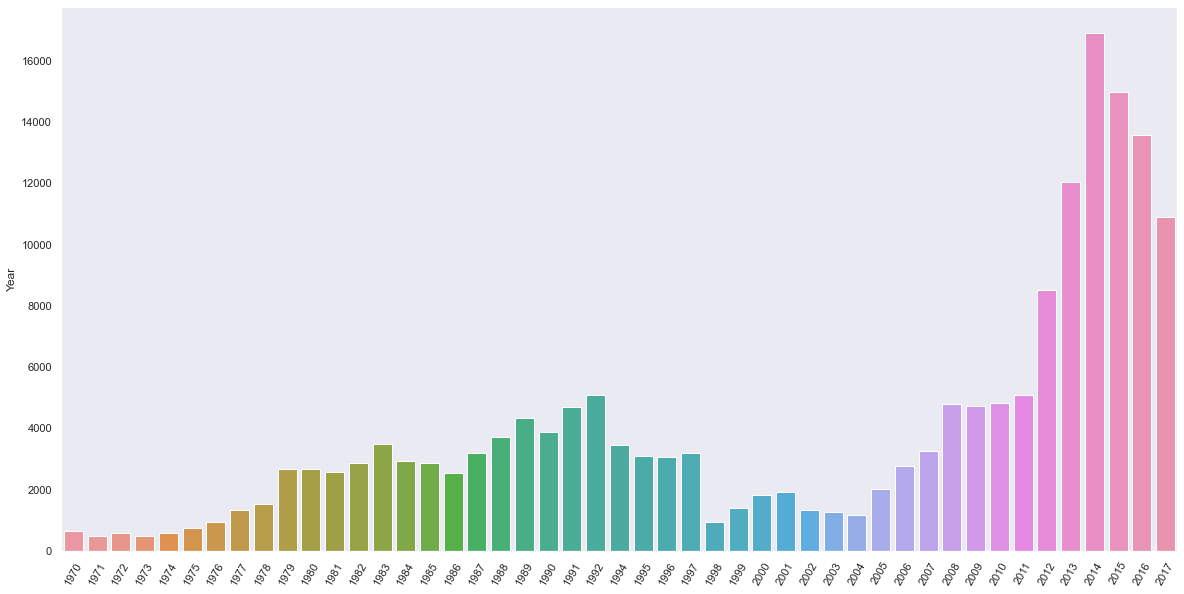

In [19]:
# Sol of Q1: No of attacks each year
plt.figure(figsize = (20,10))
sns.barplot(x=data['Year'].unique(),y=sol1)
plt.xticks(rotation=60)
plt.show()

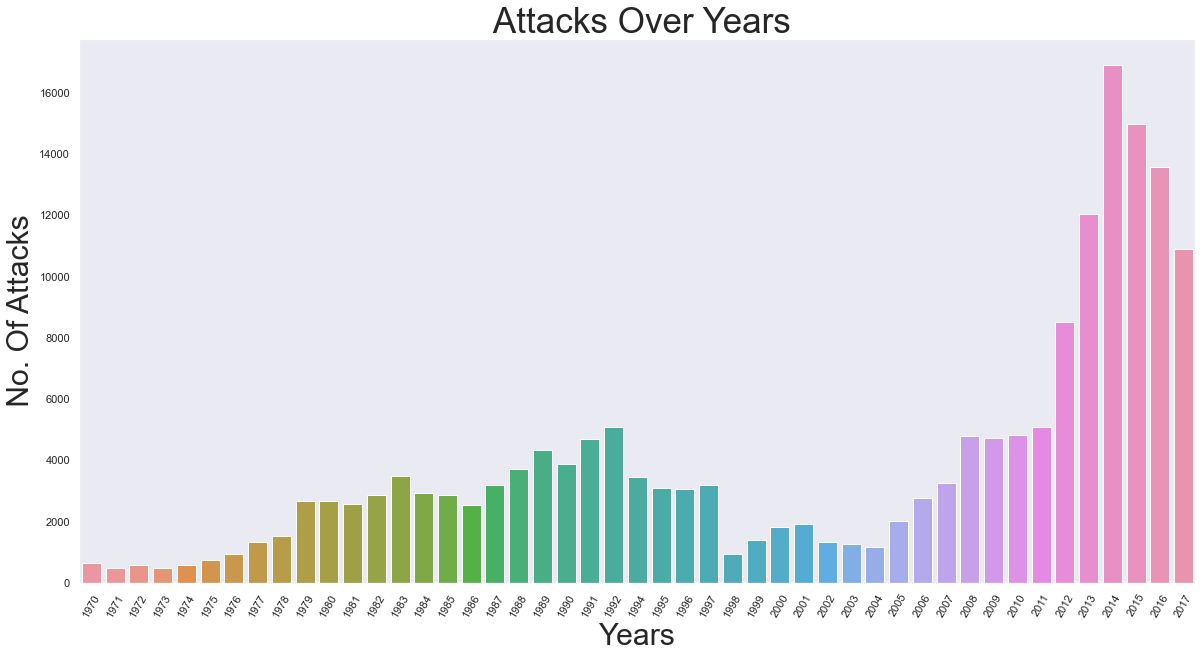

In [20]:
# Sol of Q1: No of attacks each year
plt.figure(figsize = (20,10))
sns.barplot(x=data['Year'].unique(),y=sol1)
plt.xticks(rotation=60)
plt.xlabel(" Years ",fontsize=30)
plt.ylabel(" No. Of Attacks ",size=30)
plt.title(" Attacks Over Years",size=35)
plt.show()

### Insights  From above:
- Most NO. of the attack happen in year  : 2014
- Least No. of the attack happen in year  : 1971




## Q2  :How many peoples are died in total ?

In [21]:
# solution  to Q2 
# Method 1 :
sol2 = data['Kill'].sum()
print(" Total Kills  : ",sol2)

 Total Kills  :  411868.0


In [38]:
# solution  to Q2 
# Method 2 :
sol2 = data.loc[:,'Kill']
print(" Total Kills  : ",int(sum(sol2.dropna(how="any"))))

 Total Kills  :  411868


## Q3.Terrorist Activities by Region Each year 

In [19]:
# Q3-sol :
pd.crosstab(data.Year,data.Region) # It gives every year which year how much attacks

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


<AxesSubplot:xlabel='Year'>

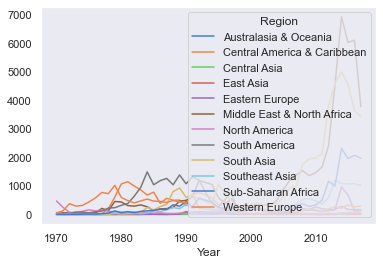

In [20]:
pd.crosstab(data.Year,data.Region).plot()

<AxesSubplot:xlabel='Year'>

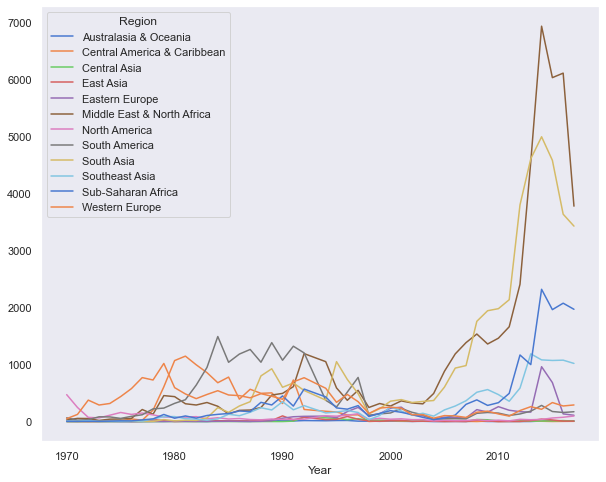

In [22]:
# Solution for Q3
pd.crosstab(data.Year,data.Region).plot(figsize=(10,8))

## Insights
- **Middle east  and north africa** is 1st  gratest affected region
- **Asia** is the 2nd greatest affected region 
- **central asia** is the the least affected area

<AxesSubplot:xlabel='Year'>

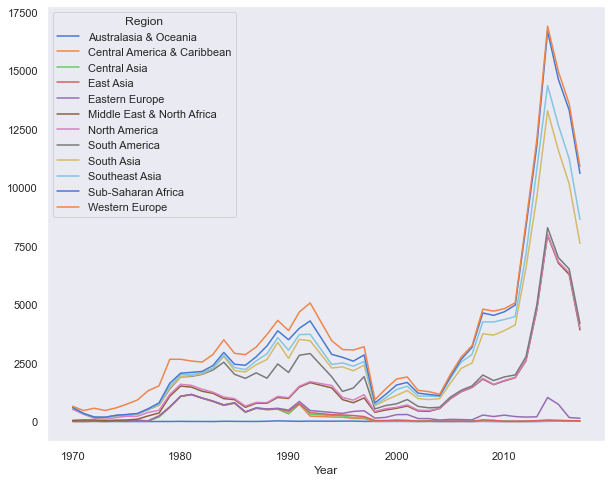

In [28]:

pd.crosstab(data.Year,data.Region).plot(figsize=(10,8),stacked=True)

<AxesSubplot:xlabel='Year'>

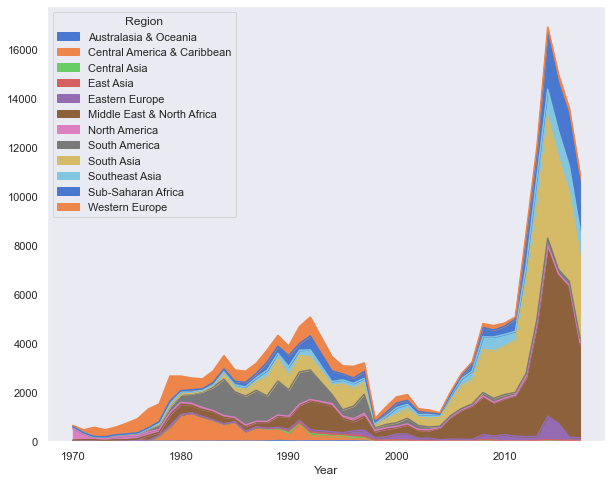

In [26]:
pd.crosstab(data.Year,data.Region).plot(kind='area',figsize=(10,8),stacked=True)
# more is the area high no. ottacks

Text(0.5, 1.0, 'Terrorist Activities by Region every year')

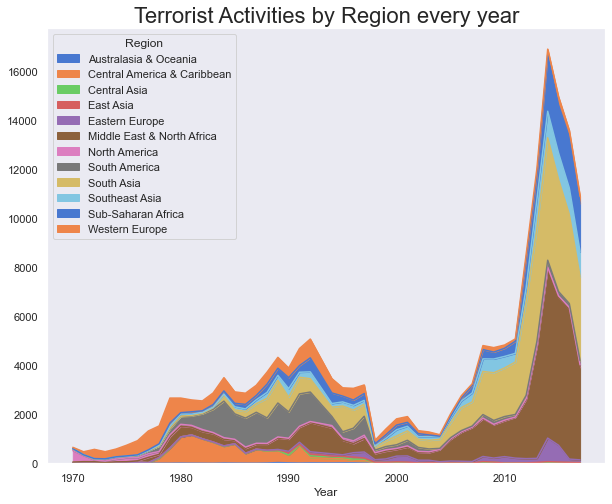

In [27]:
# sol for Q3
pd.crosstab(data.Year,data.Region).plot(kind='area',figsize=(10,8),stacked=True)
plt.title("Terrorist Activities by Region every year",size=22)

## Insights
- **Middle east  and north africa** is 1st  gratest affected region
- **Asia** is the 2nd greatest affected region 
- **central asia** is the the least affected area

## Q4.Terrorist Activities by Every Country & give most attacks country

In [40]:
# sns.barplot(x= data.Year.unique(), y= data['Country'].value_counts(dropna=True).sort_index())
np.size(data.Year.unique()) # 47
data['Country'].value_counts(dropna=True).sort_index() # here sort_index does alphabetic sort from A to Z 

Afghanistan    12731
Albania           80
Algeria         2743
Andorra            1
Angola           499
               ...  
Yemen           3347
Yugoslavia       203
Zaire             50
Zambia            62
Zimbabwe         101
Name: Country, Length: 205, dtype: int64

In [44]:
x = data['Country'].value_counts(dropna=True)
x

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


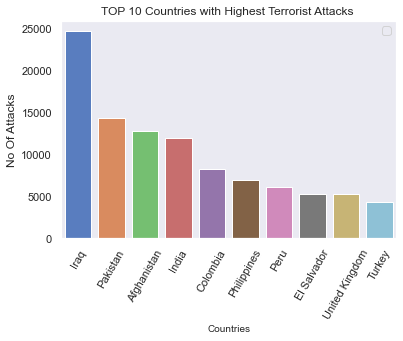

In [68]:
# sol Q4 : 

# plt.figure(figsize=(20,7))
sns.barplot(x[:10].index,x[:10].values) # ,pallete = dark
plt.xticks(rotation=60)
plt.title("TOP 10 Countries with Highest Terrorist Attacks ")
plt.xlabel("Countries") #         ,size=10
plt.ylabel("No Of Attacks")
plt.legend()
plt.show()

In [43]:
print(" Top 5 Contries in which Attacks are happened")
data['Country'].value_counts()[:5]

 Top 5 Contries in which Attacks are happened


Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

- Top 2 Countries are : Iran & Pakistan

In [69]:
data.columns

Index(['Eventid', 'Year', 'Month', 'Day', 'Country', 'Provstate', 'Region',
       'Provstate', 'City', 'latitude', 'Kill', 'longitude', 'Crit1', 'Crit2',
       'Crit3', 'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1',
       'Gname', 'Guncertain1', 'Claimed', 'Weaptype', 'summary', 'motive',
       'Wound', 'Extended', 'Ishostkid', 'Hostkidoutcome'],
      dtype='object')

In [70]:
data.Gname

0                                             MANO-D
1                 23rd of September Communist League
2                                            Unknown
3                                            Unknown
4                                            Unknown
                             ...                    
181686                                    Al-Shabaab
181687                             Muslim extremists
181688    Bangsamoro Islamic Freedom Movement (BIFM)
181689                                       Unknown
181690                                       Unknown
Name: Gname, Length: 181691, dtype: object

## Q5 : top 5 active terrorist grp/organizations ??

In [71]:
data.Gname.value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Gname, dtype: int64

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


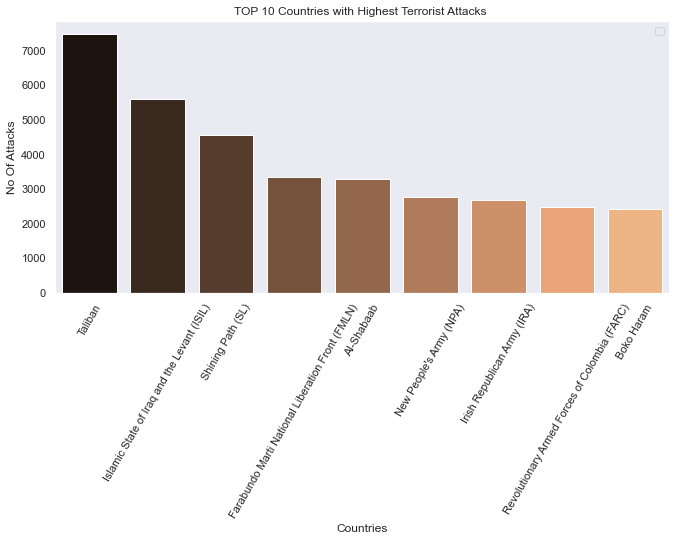

In [76]:
# sol Q5 : 

plt.subplots(figsize=(11,5))
sns.barplot(data.Gname.value_counts()[1:10].index,
            data.Gname.value_counts()[1:10].values,
           palette='copper' ) # ,pallete = dark
plt.xticks(rotation=60)
plt.title("TOP 10 Countries with Highest Terrorist Attacks ")
plt.xlabel("Countries") #         ,size=10
plt.ylabel("No Of Attacks")
plt.legend()
plt.show()

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


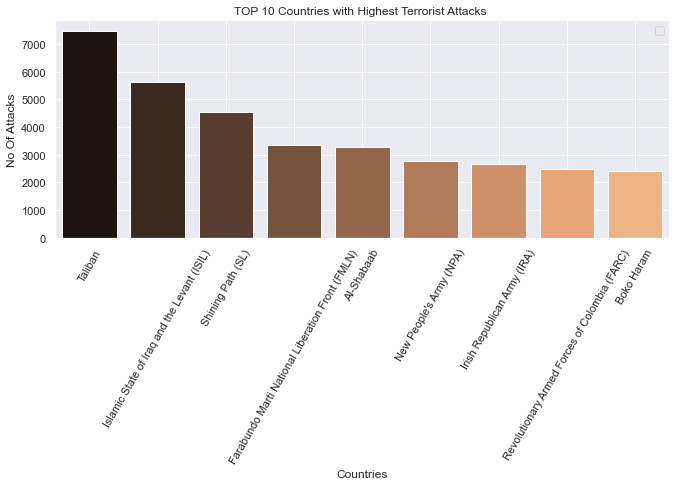

In [75]:
# same as above just giving plt.grid(True)
# sol Q5 : 

plt.subplots(figsize=(11,4))
sns.barplot(data.Gname.value_counts()[1:10].index,
            data.Gname.value_counts()[1:10].values,
           palette='copper' ) # ,pallete = dark
plt.xticks(rotation=60)
plt.title("TOP 10 Countries with Highest Terrorist Attacks ")
plt.xlabel("Countries") #         ,size=10
plt.ylabel("No Of Attacks")
plt.legend()
plt.grid(True)
plt.show()

- Insights :
### The grp with most no. of attacks is Taliban

## Q6 : Most Type of Weapons Used while Attacks ?

In [77]:
data.columns # taking Weaptype -- > col

Index(['Eventid', 'Year', 'Month', 'Day', 'Country', 'Provstate', 'Region',
       'Provstate', 'City', 'latitude', 'Kill', 'longitude', 'Crit1', 'Crit2',
       'Crit3', 'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1',
       'Gname', 'Guncertain1', 'Claimed', 'Weaptype', 'summary', 'motive',
       'Wound', 'Extended', 'Ishostkid', 'Hostkidoutcome'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee'),
  Text(5, 0, 'Chemical'),
  Text(6, 0, 'Sabotage Equipment'),
  Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Biological')])

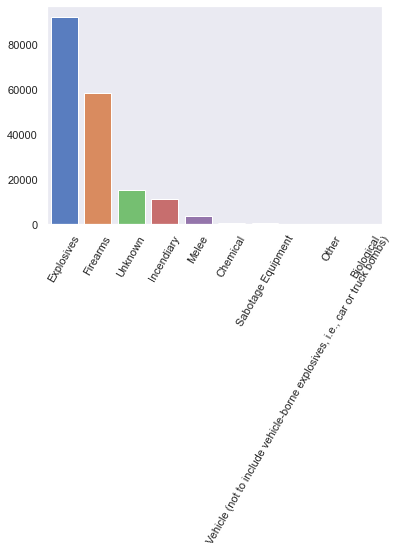

In [91]:
# sol Q 6
sns.barplot(x=data.Weaptype.value_counts()[:10].index,
           y=data.Weaptype.value_counts()[:10].values,
           )
plt.xticks(rotation=60)

<AxesSubplot:>

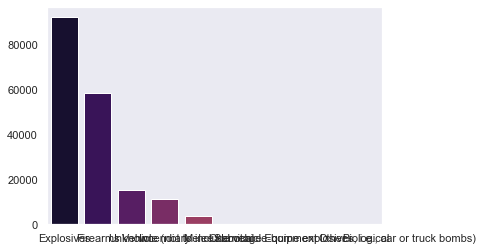

In [79]:
sns.barplot(x=data.Weaptype.value_counts()[:10].index,
           y=data.Weaptype.value_counts()[:10].values,
           palette="inferno")

In [81]:
sns.countplot??

## Learning  countplot

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Explosives'),
  Text(2, 0, 'Incendiary'),
  Text(3, 0, 'Firearms'),
  Text(4, 0, 'Chemical'),
  Text(5, 0, 'Melee'),
  Text(6, 0, 'Sabotage Equipment'),
  Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
  Text(8, 0, 'Fake Weapons'),
  Text(9, 0, 'Radiological'),
  Text(10, 0, 'Other'),
  Text(11, 0, 'Biological')])

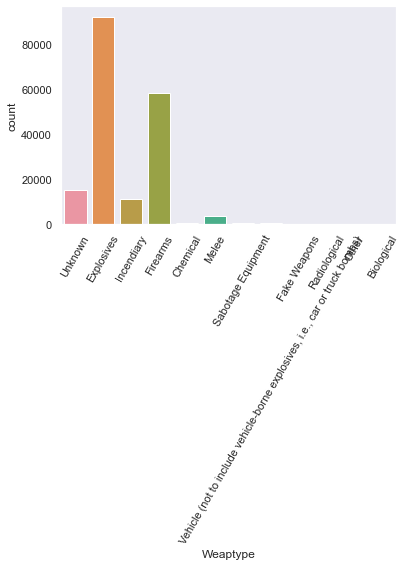

In [85]:
sns.countplot(data['Weaptype'])
plt.xticks(rotation=60)

C:\Users\Mitesh Rege\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Explosives'),
  Text(1, 0, 'Firearms'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Incendiary'),
  Text(4, 0, 'Melee'),
  Text(5, 0, 'Chemical'),
  Text(6, 0, 'Sabotage Equipment'),
  Text(7, 0, 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'),
  Text(8, 0, 'Other'),
  Text(9, 0, 'Biological'),
  Text(10, 0, 'Fake Weapons'),
  Text(11, 0, 'Radiological')])

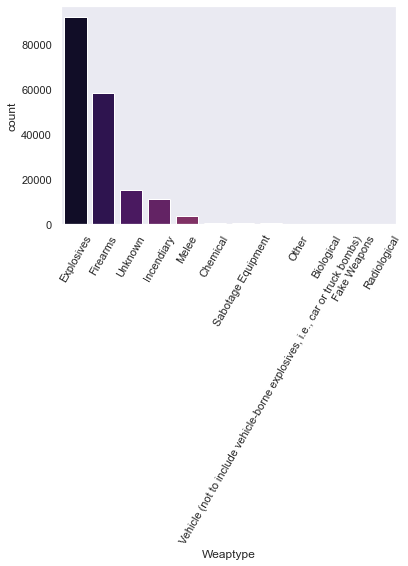

In [90]:
sns.countplot('Weaptype',data = data ,palette="inferno",order=data['Weaptype'].value_counts().index)
plt.xticks(rotation=60)

- Insights :
 - Explosives are the most used wepon type in the terrorist attacks occured in last 3 decades 

## Q7 : How many no. Attacks are Succees & Failed ??

In [94]:
data.columns # we are takinf Success col takes 1 and 0 values

Index(['Eventid', 'Year', 'Month', 'Day', 'Country', 'Provstate', 'Region',
       'Provstate', 'City', 'latitude', 'Kill', 'longitude', 'Crit1', 'Crit2',
       'Crit3', 'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1',
       'Gname', 'Guncertain1', 'Claimed', 'Weaptype', 'summary', 'motive',
       'Wound', 'Extended', 'Ishostkid', 'Hostkidoutcome'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1971'),
  Text(2, 0, '1972'),
  Text(3, 0, '1973'),
  Text(4, 0, '1974'),
  Text(5, 0, '1975'),
  Text(6, 0, '1976'),
  Text(7, 0, '1977'),
  Text(8, 0, '1978'),
  Text(9, 0, '1979'),
  Text(10, 0, '1980'),
  Text(11, 0, '1981'),
  Text(12, 0, '1982'),
  Text(13, 0, '1983'),
  Text(14, 0, '1984'),
  Text(15, 0, '1985'),
  Text(16, 0, '1986'),
  Text(17, 0, '1987'),
  Text(18, 0, '1988'),
  Text(19, 0, '1989'),
  Text(20, 0, '1990'),
  Text(21, 0, '1991'),
  Text(22, 0, '1992'),
  Text(23, 0, '1994'),
  Text(24, 0, '1995'),
  Text(25, 0, '1996'),
  Text(26, 0, '1997'),
  Text(27, 0, '1998'),
  Text(28, 0, '1999'),
  Text(29, 0, '2000'),
  Text(30, 0, '2001'),
  Text(31, 0, '2002'),
  Text(32, 0, '2003'),
  Text(33, 0, '2004'),
  Text(34, 0, 

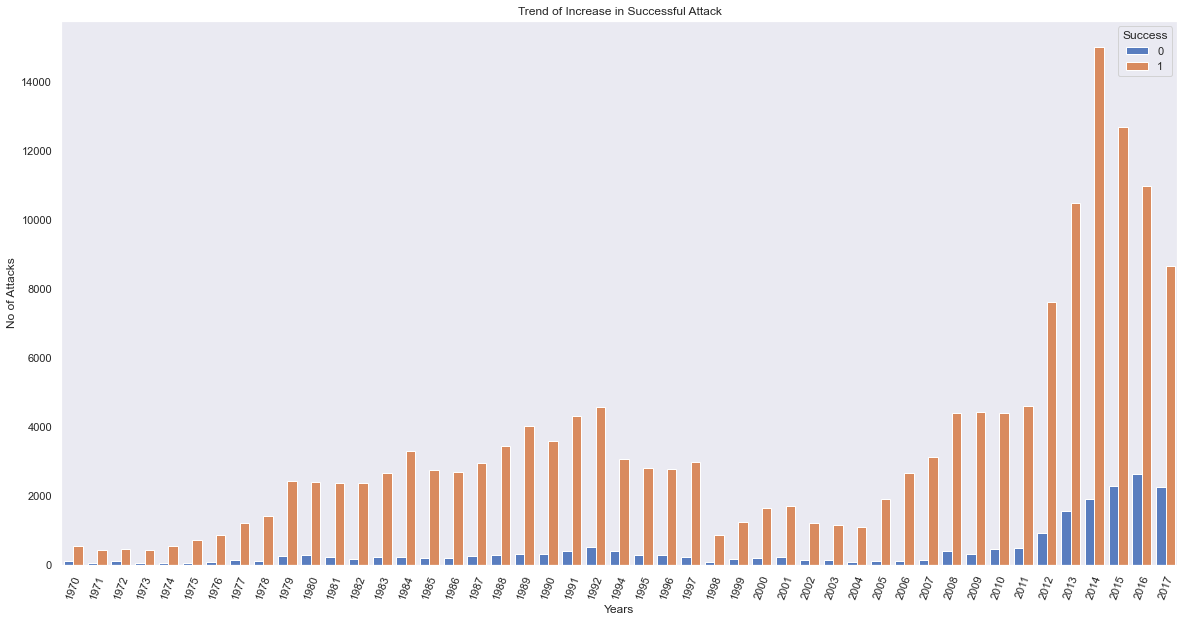

In [96]:
#  Sol Q7 :
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=data,hue="Success")
plt.xlabel('Years')
plt.ylabel('No of Attacks')
plt.title('Trend of Increase in Successful Attack')
plt.xticks(rotation=70)

- Insights :
- 

## Q8 : Most Affected Targets 

In [97]:
data.columns

Index(['Eventid', 'Year', 'Month', 'Day', 'Country', 'Provstate', 'Region',
       'Provstate', 'City', 'latitude', 'Kill', 'longitude', 'Crit1', 'Crit2',
       'Crit3', 'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1',
       'Gname', 'Guncertain1', 'Claimed', 'Weaptype', 'summary', 'motive',
       'Wound', 'Extended', 'Ishostkid', 'Hostkidoutcome'],
      dtype='object')

<AxesSubplot:>

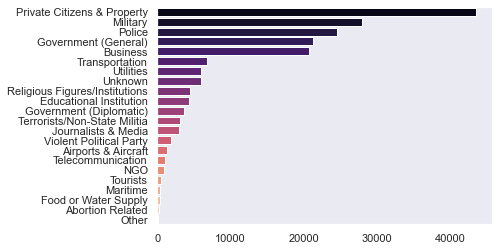

In [98]:
sns.barplot(y=data['Targtype'].value_counts().index,
            x=data['Targtype'].value_counts().values,
           palette="magma")
plt.title('Most Affected Targets')
plt.tight_layout() # It arranges the chart very well to insure that it will not overlap 

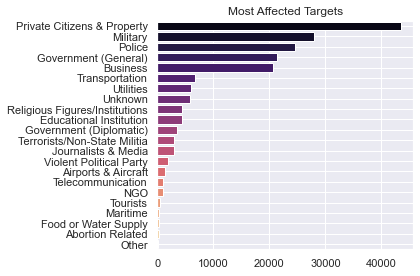

In [99]:
sns.barplot(y=data['Targtype'].value_counts().index,
            x=data['Targtype'].value_counts().values,
           palette="magma")
plt.title('Most Affected Targets')
plt.tight_layout() # It arranges the chart very well to insure that it will not overlap 
plt.grid(True)

- Majot insights :
### Most of the attacks are done on the Private Citizens & Property

# End Of Session 
# ThankYou